In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nf = pd.read_csv('mymoviedb.csv',lineterminator = '\n')
nf.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [3]:
nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [4]:
nf.duplicated().sum()

0

In [5]:
nf['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [6]:
nf.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


### Exploration Summery - 
1. We have a datafram consisting of 9 columns and 9827 rows.
2. Our dataset looks good as it doesn't have NaNs or duplicated values.
3. Release_date column needs to be casted into the datetime and extract only year value.
4. Overview and Poster_Url are not useful for analysis, so we'll drop them.
5. Vote_Average better to be categorised for proper analysis.
6. Genre column has commma separated values and white spaces that needs to be handled and casted into category.

### Converting Release_Date column into date time format and extracting year only.

In [9]:
nf['Release_Date'] = pd.to_datetime(nf['Release_Date'])
print(nf['Release_Date'].dtypes)

datetime64[ns]


In [10]:
nf['Release_Date'] = nf['Release_Date'].dt.year
print(nf['Release_Date'].dtypes)

int32


In [11]:
nf.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


### Dropping the columns - 

In [13]:
cols = ['Overview','Poster_Url']
nf.drop(cols, axis=1, inplace = True)
nf.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Original_Language', 'Genre'],
      dtype='object')

In [14]:
nf.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,en,"Crime, Mystery, Thriller"


### Categorising Vote Average column
- Four lables basis of vote average - Popular, Average, Below Average, Not Popular as Categorize_Col

In [16]:
def Categorize_Col(df,col,labels):
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]
    df[col] = pd.cut(df[col], edges, labels = labels, duplicates='drop')
    return df

In [17]:
labels = ['Not_Popular','Below_Average','Average','Popular']
Categorize_Col(nf,'Vote_Average',labels)
nf['Vote_Average'].unique()

['Popular', 'Below_Average', 'Average', 'Not_Popular', NaN]
Categories (4, object): ['Not_Popular' < 'Below_Average' < 'Average' < 'Popular']

In [18]:
nf.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,en,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Popular,en,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,Below_Average,en,Thriller
3,2021,Encanto,2402.201,5076,Popular,en,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Average,en,"Action, Adventure, Thriller, War"


In [19]:
nf['Vote_Average'].value_counts()

Vote_Average
Not_Popular      2467
Popular          2450
Average          2412
Below_Average    2398
Name: count, dtype: int64

In [20]:
nf.isna().sum()

Release_Date           0
Title                  0
Popularity             0
Vote_Count             0
Vote_Average         100
Original_Language      0
Genre                  0
dtype: int64

In [21]:
nf.dropna(inplace=True)
nf.isna().sum()

Release_Date         0
Title                0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
dtype: int64

In [22]:
nf['Genre'] = nf['Genre'].str.split(', ')

In [23]:
nf = nf.explode('Genre').reset_index(drop = True)
nf.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,en,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,en,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,en,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,en,Crime
4,2022,The Batman,3827.658,1151,Popular,en,Mystery


In [24]:
### Casting Column  into Category
nf['Genre'] = nf['Genre'].astype('category')
nf['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [25]:
nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Release_Date       25552 non-null  int32   
 1   Title              25552 non-null  object  
 2   Popularity         25552 non-null  float64 
 3   Vote_Count         25552 non-null  int64   
 4   Vote_Average       25552 non-null  category
 5   Original_Language  25552 non-null  object  
 6   Genre              25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(2)
memory usage: 949.2+ KB


In [26]:
nf.nunique()

Release_Date          100
Title                9415
Popularity           8088
Vote_Count           3265
Vote_Average            4
Original_Language      42
Genre                  19
dtype: int64

## Data Visualization 

In [28]:
sns.set_style('whitegrid')

In [29]:
### What is the most frequent genre of movies released on Netflix?
nf['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

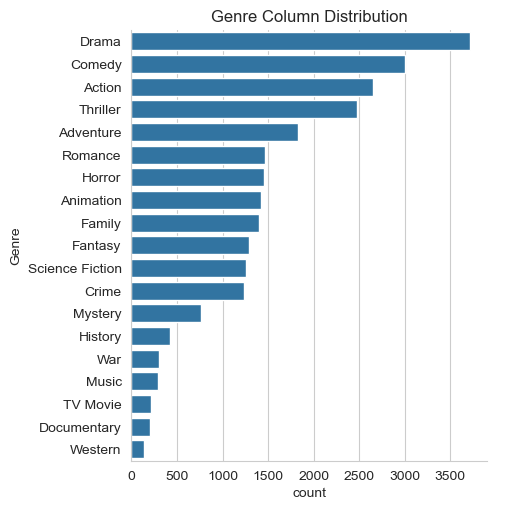

In [30]:
sns.catplot(y='Genre',data=nf,kind='count',order=nf['Genre'].value_counts().index)
plt.title("Genre Column Distribution")
plt.show()

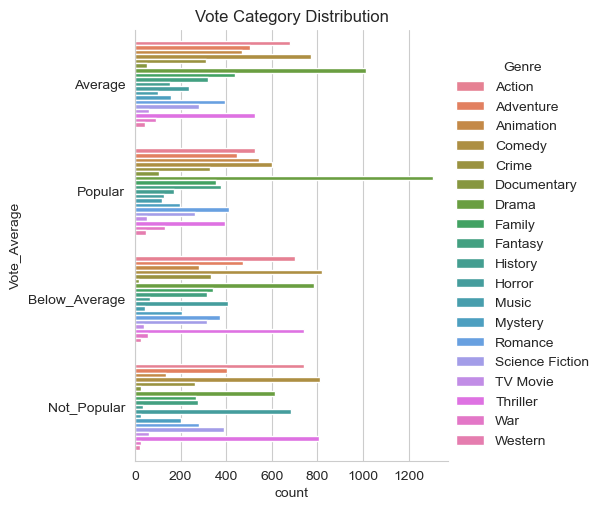

In [71]:
### Which has highest votes in Vote_Average column?
sns.catplot(y='Vote_Average',data=nf,kind='count',hue='Genre',order=nf['Vote_Average'].value_counts().index)
plt.title("Vote Category Distribution")
plt.show()

In [32]:
### What movie got the highest popularity? What's its genre?

nf[nf['Popularity']==nf['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,en,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,en,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,en,Science Fiction


In [33]:
### What movie got the Lowest popularity? What's its genre?
nf[nf["Popularity"]==nf["Popularity"].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,Average,en,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,Average,en,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,Average,en,History
25549,1984,Threads,13.354,186,Popular,en,War
25550,1984,Threads,13.354,186,Popular,en,Drama
25551,1984,Threads,13.354,186,Popular,en,Science Fiction


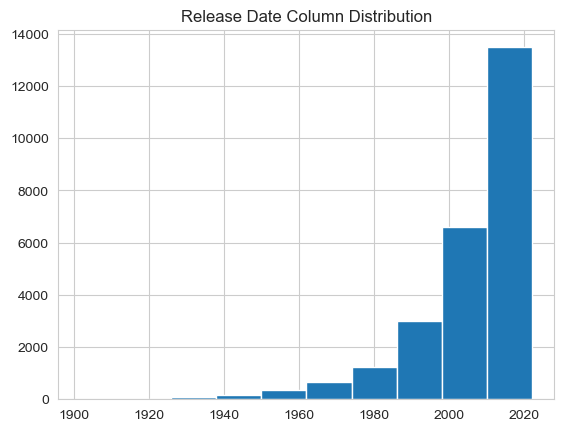

In [34]:
### Which year has most Released movies?
nf["Release_Date"].hist()
plt.title("Release Date Column Distribution")
plt.show()

### Conclusion - 
- Drama is the most frequent genre of movies released on Netflix amonog 19 genres.
- We have 25.5% of our dataset with popular votes. Drama again gets the highest popularity among fans having more than 18.5% of movies
- Spider-Man: No Way Home has the highest popularity with in genres of Action, Adventure and Science Fiction.
- The United States vs. Billie Holiday and Threads have lowest popularity with in genres of Music, Drama, History, War and Science Fiction.
- Year 2020 has given highest released movies on Netflix.